# Линейная регрессия

## Описание

В этом проекте вы будете работать аналитиком данных вместе с командой по учебной программе, чтобы помочь нам улучшить опыт обучения. Хотя эти данные имитируются, они похожи на реальные данные, которые мы, возможно, захотим исследовать.

../files/academy.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
academy = pd.read_csv('../files/academy.csv')

print(academy.head())

   score  completed    lesson
0   82.7       35.0  Lesson A
1   65.2       31.0  Lesson A
2   55.3       33.0  Lesson A
3   28.8       25.0  Lesson B
4   31.2       18.0  Lesson B


Описание набора данных
- score - оценка студента за тест
- completed - кол-во других элементов контента, которые учащиеся завершили до этого теста
- lesson - указывает, какой урок учащийся прошел непосредственно перед тестом (`Lesson A` или `Lesson B`)

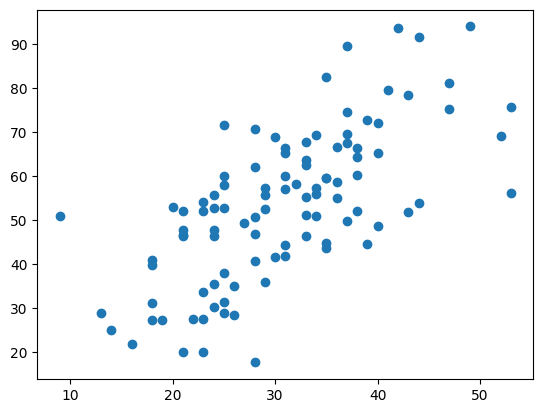

<Figure size 640x480 with 0 Axes>

In [3]:
# смоделируйте взаимосвязь между оценкой за тест и кол-вом завершенных элементов
# постройте диаграмму рассеивания score (ось Y) по отношению к completed (ось X), чтобы увидеть связь между оценкой за тест и кол-ом завершенных элементов контента.
plt.scatter(y=academy.score, x=academy.completed)
plt.show()
plt.clf()

In [4]:
# создайте и подгоните линейную регрессионную модель, которая предсказывает, score используя completed в качестве предиктора. Распечатайте коэффициенты регрессии
model = sm.OLS.from_formula('score ~ completed', data=academy)
result = model.fit()
print(result.params)

Intercept    13.214113
completed     1.306826
dtype: float64


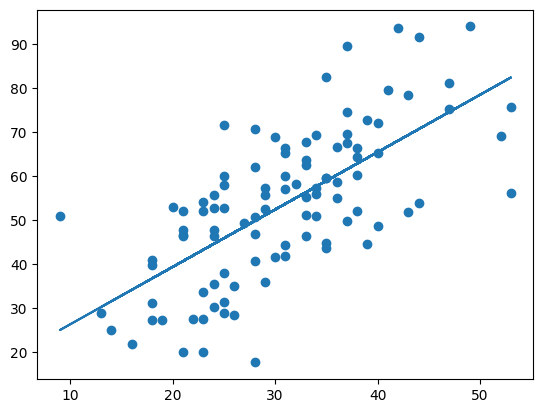

<Figure size 640x480 with 0 Axes>

In [10]:
# постройте график с линией регрессии
plt.scatter(y=academy.score, x=academy.completed)
plt.plot(academy.completed, result.predict(academy))
plt.show()
plt.clf()

In [12]:
# используйте свою модель для расчета прогнозируемого результата теста для учащегося, который ранее выполнил 20 других элементов контента
pred20 = result.params.iloc[1]*20 + result.params.iloc[0]

print(pred20)

newdata = {"completed":[20]}
print(result.predict(newdata))

39.350624877322936
0    39.350625
dtype: float64


In [14]:
# рассчитайте подобранные значения для вашей модели и сохраните их как fitted_values
fitted_values = result.predict(academy)

print(fitted_values)

0     58.953009
1     53.725706
2     56.339358
3     45.884753
4     36.736974
        ...    
95    53.725706
96    82.475869
97    43.271102
98    40.657450
99    51.112055
Length: 100, dtype: float64


In [15]:
# рассчитайте остатки для модели и сохраните результат как residuals
residuals = academy.score - fitted_values

print(residuals)

0     23.746991
1     11.474294
2     -1.039358
3    -17.084753
4     -5.536974
        ...    
95     6.274294
96    -6.675869
97   -15.871102
98     5.942550
99     6.187945
Length: 100, dtype: float64


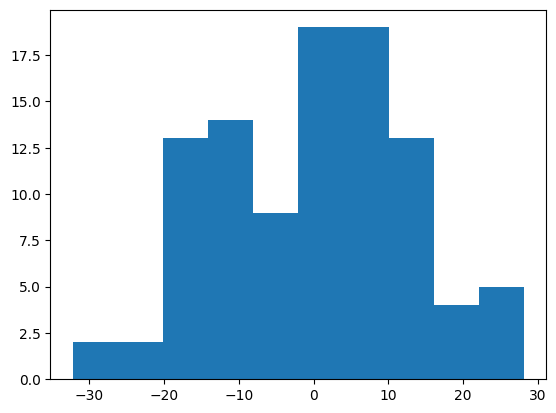

<Figure size 640x480 with 0 Axes>

In [16]:
# проверьте предположение о нормальности для линейной регрессии, построив гистограмму остатков. 
plt.hist(residuals)
plt.show()
plt.clf()

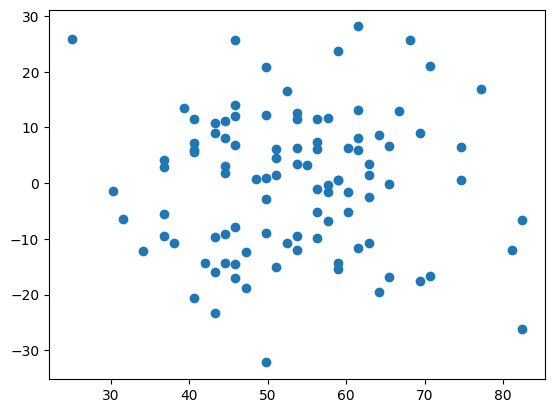

<Figure size 640x480 with 0 Axes>

In [17]:
# проверьте предположение о гомоскедастичности для линейной регресии, построив график остатков (ось Y) относительно подобранных значений (ось X)
plt.scatter(y=residuals, x=fitted_values)
plt.show()
plt.clf()

### Учащиеся изучающие урок A или B показывают лучшие результаты в тесте ?

Давайте теперь обратим внимание на lessons столбец и посмотрим, набрали ли учащиесяЮ посещавшие разные уроки, разные баллы за тест. 

Используйте sns.boxplot для создания диаграммы ящиков score (y), lessons (x), чтобы увидеть связь между оценкой за тест и уроком, который учащийся завершил непосредственно перед прохождением теста.

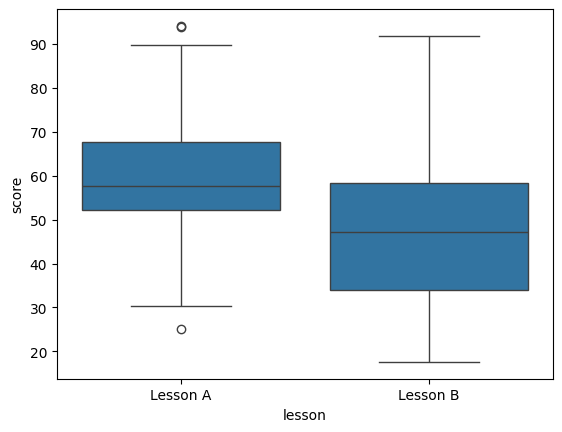

<Figure size 640x480 with 0 Axes>

In [19]:
sns.boxplot(y = academy.score, x = academy.lesson)
plt.show()
plt.clf()

In [20]:
model = sm.OLS.from_formula('score ~ lesson', data=academy)
result = model.fit()

print(result.params)

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


In [22]:
mean_a = np.mean(academy[academy.lesson == 'Lesson A'].score)
mean_b = np.mean(academy[academy.lesson == 'Lesson B'].score)

print(mean_a, mean_b, sep='\n')

59.220000000000006
47.578


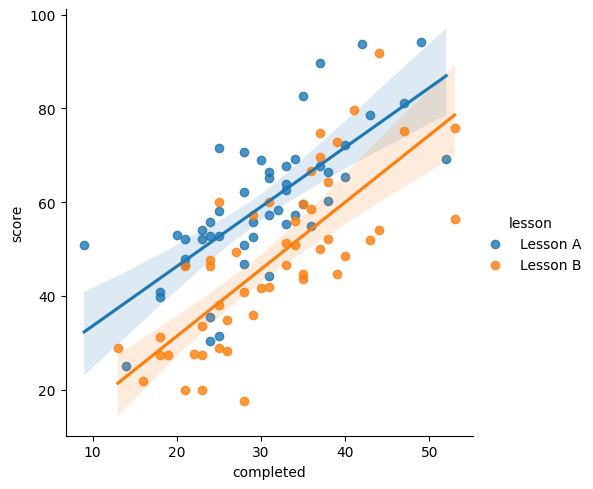

In [23]:
sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = academy)
plt.show()